In the present study we are analyzing biometric data related to an endemic species of central-southern Italy. The measurements of diagnostic characters established were carried out on 3 ramets belonging to the same sample. For each of the 18 populations considered, 5 samples were examined, for a total of 270 ramets.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
my_file = "sorry_cant_share_the_data.xlsx"
df = pd.read_excel(my_file)
df.head(15)

,Populations,Samples,Ramets,character_1,character_2,character_3
0,S01,A,1,306,21.5,0.2
1,S01,A,2,305,21.5,0.1
2,S01,A,3,285,21.0,0.1
3,S01,B,1,310,19.0,0.6
4,S01,B,2,355,20.0,0.4
5,S01,B,3,340,20.0,0.3
6,S01,C,1,320,20.0,0.8
7,S01,C,2,304,19.8,0.8
8,S01,C,3,255,19.5,0.7
9,S01,D,1,267,19.0,0.2


## Attribution of the characters observed to the respective subspecies, based on known dichotomous keys



| Subspecies	| Diagnostic Character 1 |	Diagnostic Character 2	| Diagnostic Character 3 |
| --- | --- | --- |  --- |
|subspecies 1	|260-290	| 17-18.99| 	0,2-0,3
|subspecies 2	|300-319.99	|19.01 20.99	|0,1
|subspecies 3	|320.01-350	|21.01-24	|0,5-2
|subspecies 4	|160-210	|13-15	|absent
|unclassifiable	| 320	    |19, 21	|
			


*unclassifiable* gaps have been found in the ranges of values indicated for the discrimination of the various under-specific entities

In [203]:
df["classification_character_1"] = "na"
df["classification_character_2"] = "na"
df["classification_character_3"] = "na"

In [151]:
def initiliase_classif(df, character_string, my_range, classification_value):
    
    my_condition = df[character_string].between(my_range[0], my_range[1])
    df["classification_" + character_string].loc[my_condition] = classification_value

    return df

In [152]:
df = initiliase_classif(df, "character_1", [260,290], "sub_1")
df = initiliase_classif(df, "character_1", [300,319.99], "sub_2")
df = initiliase_classif(df, "character_1", [320.01,350], "sub_3")
df = initiliase_classif(df, "character_1", [160,210], "sub_4")


df = initiliase_classif(df, "character_2", [17,18.99], "sub_1")
df = initiliase_classif(df, "character_2", [19.01,20.99], "sub_2")
df = initiliase_classif(df, "character_2", [21.01,24], "sub_3")
df = initiliase_classif(df, "character_1", [13,15], "sub_4")


df = initiliase_classif(df, "character_3", [0.2,0.3], "sub_1")
df = initiliase_classif(df, "character_3", [0.1,0.1], "sub_2")
df = initiliase_classif(df, "character_3", [0.5,2], "sub_3")
df = initiliase_classif(df, "character_3", [0,0], "sub_4")
df.head()

C:\Users\Utente\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Populations,Samples,Ramets,character_1,character_2,character_3,classification_character_1,classification_character_2,classification_character_3
0,S01,A,1,306,21.5,0.2,sub_2,sub_3,sub_1
1,S01,A,2,305,21.5,0.1,sub_2,sub_3,sub_2
2,S01,A,3,285,21.0,0.1,sub_1,na,sub_2
3,S01,B,1,310,19.0,0.6,sub_2,na,sub_3
4,S01,B,2,355,20.0,0.4,na,sub_2,na


In [203]:
df["classification_character_1"] = "na"
df["classification_character_2"] = "na"
df["classification_character_3"] = "na"

Let's look at how the distribution of the different characters is..

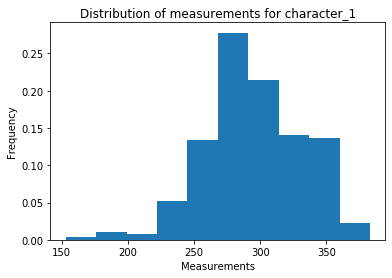

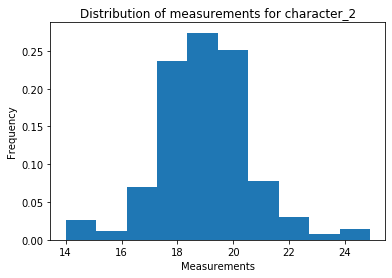

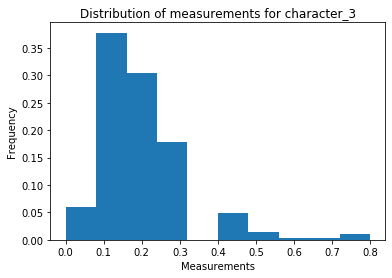

In [154]:
for col in character_cols:
    plt.figure()
    df[col].plot.hist(weights = list(np.ones_like(df.index) / len(df.index)))
    plt.title("Distribution of measurements for " + col)
    plt.xlabel("Measurements")

Let's see how each measurement for each character would be classified

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

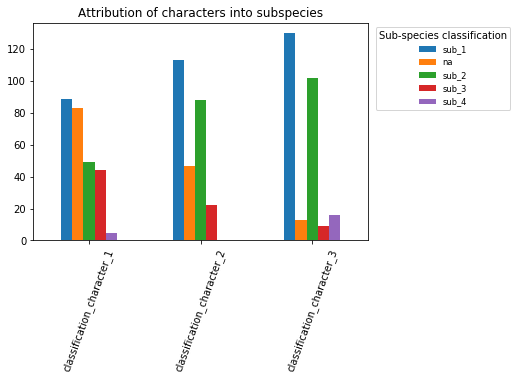

In [202]:
my_count_df =  pd.DataFrame(pd.value_counts(df["classification_character_1"]))
my_count_df["classification_character_2"]  =  pd.DataFrame(pd.value_counts(df["classification_character_2"]))
my_count_df["classification_character_3"]  =  pd.DataFrame(pd.value_counts(df["classification_character_3"]))
my_count_df.transpose().plot.bar()
legend = plt.legend(title="Sub-species classification", fontsize='small', fancybox=True, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title("Attribution of characters into subspecies")
plt.xticks(rotation=70)

## Classification of ramets

On ramet basis for ramet, how often do the 3 characters agree and therefore it is possible to attribute the ramet to a precise subspecies?

In [195]:
my_classifications = df[classific_cols].copy()
my_classifications["classification_character_1"].replace(to_replace = "na", value ="na_1", inplace = True)
my_classifications["classification_character_2"].replace(to_replace = "na", value ="na_2", inplace = True)
my_classifications["classification_character_3"].replace(to_replace = "na", value ="na_3", inplace = True)
my_classifications["n_unique_values"] = my_classifications.apply(pd.Series.nunique, axis=1)

my_classifications["classification_output"] = my_classifications["n_unique_values"]

my_classifications["classification_output"].replace(to_replace = 1, value ="classification agreed", inplace = True)
my_classifications["classification_output"].replace(to_replace = 2, value ="two characters agree", inplace = True)
my_classifications["classification_output"].replace(to_replace = 3, value ="all characters disagree", inplace = True)

my_classifications.head()

,classification_character_1,classification_character_2,classification_character_3,n_unique_values,classification_output
0,sub_2,sub_3,sub_1,3,all characters disagree
1,sub_2,sub_3,sub_2,2,two characters agree
2,sub_1,na_2,sub_2,3,all characters disagree
3,sub_2,na_2,sub_3,3,all characters disagree
4,na_1,sub_2,na_3,3,all characters disagree


Text(0.5, 1.0, '% of ramets that we can classify')

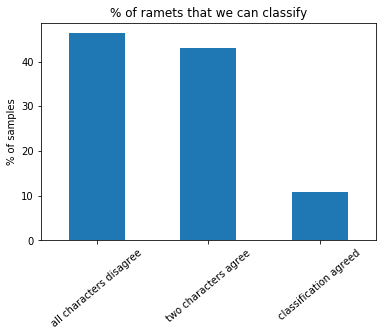

In [200]:
my_counts = pd.value_counts(my_classifications["classification_output"])
normalised_counts = 100*my_counts/my_counts.sum()
normalised_counts.plot.bar()
plt.xticks(rotation=40)
plt.ylabel("% of samples")
plt.title("% of ramets that we can classify")

Interestingly, only about 10% of the ramets can be classified using the suggested classification method.